In [1]:
import pickle

import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import datetime as dt
from macrosim.SeriesAccessor import SeriesAccessor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
with open('out.pkl', 'rb') as f:
    df = pickle.load(f)
for col in df.columns[:-1]:
    df[col] = df[col].apply(lambda x: x[0])
df

,CONSUMPTION,DOMINV,REXP,RIMP,output
0,10391.920461,2367.003360,1266.066053,1898.251033,15456.867038
1,10593.275988,2307.639723,1309.516511,1909.823607,15719.958701
2,10790.932818,2400.743777,1318.891949,1938.074173,16030.464064
3,10709.381327,2300.662207,1299.486114,1985.154333,15824.502005
4,10758.087008,2383.149310,1292.527471,2026.600707,15906.225845
5,10901.803391,2296.067720,1328.050826,2062.779517,16053.509780
6,11163.604719,2400.112333,1379.794339,2066.500733,16485.793849
7,11266.341689,2341.845097,1393.560254,2087.185150,16587.188880
8,11217.365323,2308.929027,1374.872593,2094.980823,16490.866027
9,11285.900617,2395.751660,1366.278503,2126.085790,16606.551233


In [3]:
fred = SeriesAccessor(
    key_path='../fred_key.env',
    key_name='FRED_KEY'
)
start = dt.datetime.fromisoformat('2002-01-01')
end = dt.datetime.fromisoformat('2024-12-31')

act = fred.get_series(
    series_ids=['GDPC1'],
    series_alias=['RGDP'],
    date_range=(start, end)
)

act.reset_index(inplace=True, drop=True)

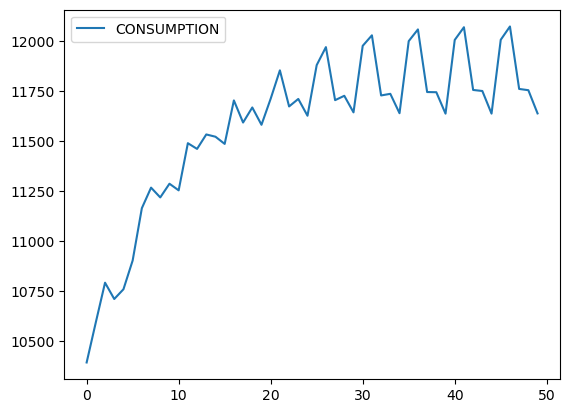

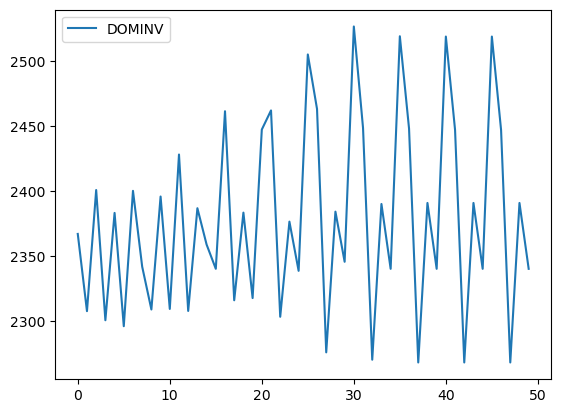

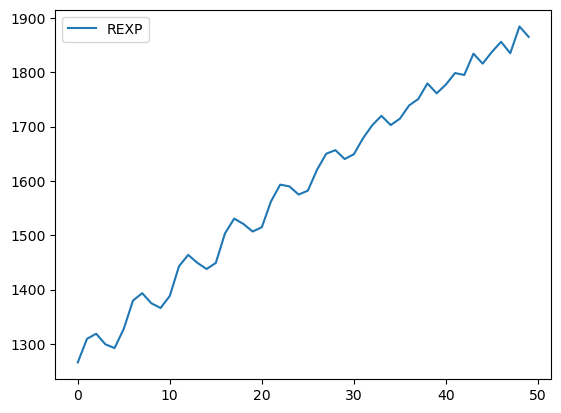

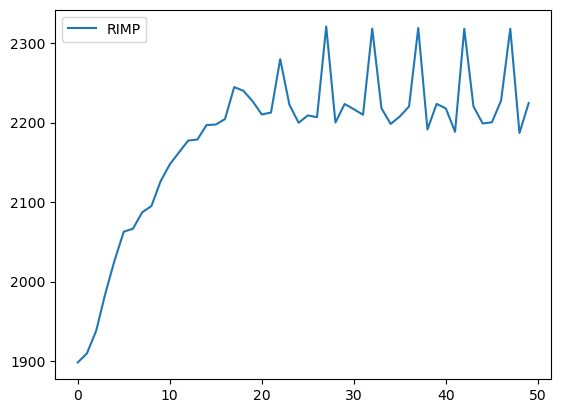

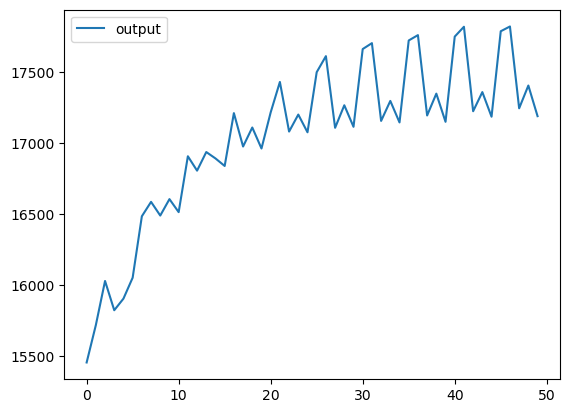

<Figure size 640x480 with 0 Axes>

In [4]:
for col in df.columns:
    plt.plot(df[col], label=col)
    plt.legend()
    plt.show()
plt.clf()

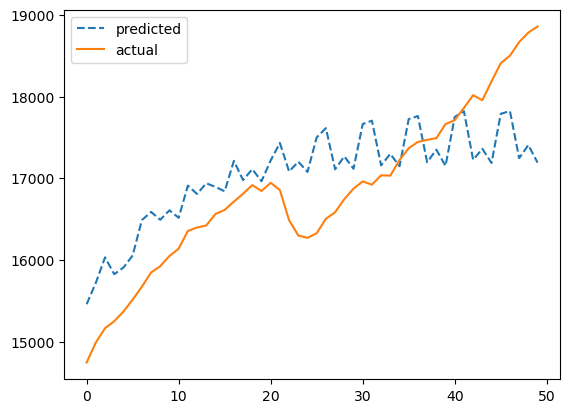

In [5]:
pred = df['output']
act = act.iloc[5:55].reset_index(drop=True)

plt.plot(pred, label='predicted', linestyle='--')
plt.plot(act, label='actual')
plt.legend()

In [6]:
r2_score(act, pred)

0.5311467619876997